
1. What is K-Means?


K-Means is an unsupervised machine learning algorithm used 
to group data points into 'k' distinct clusters based on their features.

Steps:
1. Choose the number of clusters (k).
2. Initialize k centroids randomly.
3. Assign each point to the nearest centroid.
4. Recalculate centroids as the mean of assigned points.
5. Repeat until centroids stabilize (no significant change).

Goal: Minimize the "within-cluster sum of squares" (WCSS).


## K-Means Clustering: A Self-Explained Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # for 3D plots
import seaborn as sns

# Set plot style
sns.set(style="whitegrid", palette="muted")





2. Generate Synthetic Data

We'll create a dataset using make_blobs for simplicity.



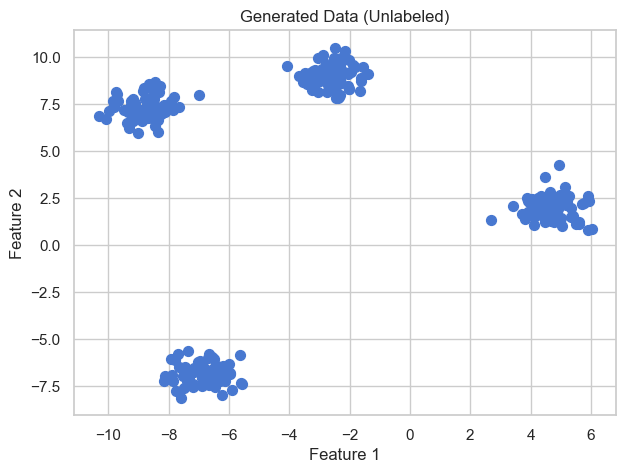

In [2]:
X, y_true = make_blobs(
    n_samples=300, 
    centers=4, 
    cluster_std=0.60, 
    random_state=42
)

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data (Unlabeled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



3. Applying K-Means

In [3]:
k = 4  # number of clusters (we know this from data generation)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_



c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


# Visualizing how it works

c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


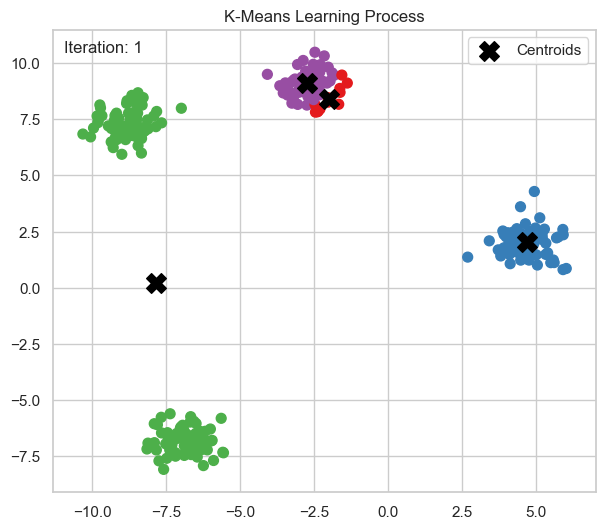

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

initial_centroids = X[np.random.choice(len(X), k, replace=False)]

centroids = initial_centroids.copy()
max_iters = 10  # just for visualization

# To store centroids at each step
centroid_history = [centroids.copy()]
labels_history = []



def assign_clusters(X, centroids):
    """Assigns each point to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Computes new centroids as mean of assigned points."""
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids



for _ in range(max_iters):
    labels = assign_clusters(X, centroids)
    labels_history.append(labels)
    new_centroids = update_centroids(X, labels, k)
    centroid_history.append(new_centroids.copy())
    
    # Stop if centroids don’t change (convergence)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids


colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']

fig, ax = plt.subplots(figsize=(7, 6))
scat = ax.scatter([], [], s=50)
cent_scat = ax.scatter([], [], c='black', s=200, marker='X', label='Centroids')
text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_title("K-Means Learning Process")
ax.legend()

def update(frame):
    labels = labels_history[frame]
    centroids = centroid_history[frame + 1]
    scat.set_offsets(X)
    scat.set_color([colors[l % len(colors)] for l in labels])
    cent_scat.set_offsets(centroids)
    text.set_text(f"Iteration: {frame + 1}")
    return scat, cent_scat, text



anim = FuncAnimation(fig, update, frames=len(labels_history), interval=1000, repeat=False)
HTML(anim.to_jshtml()) 

## Understanding the Elbow Method

The Elbow Method helps find the optimal number of clusters (k) by plotting WCSS (inertia) vs. k.

c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memor

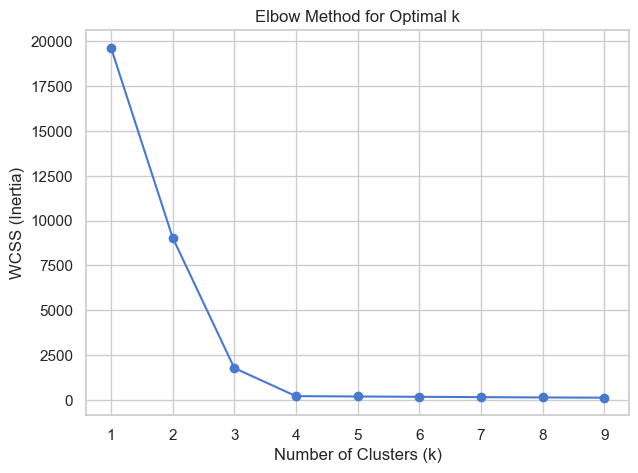

In [7]:

wcss = []
K = range(1, 10)
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()



   Feature_1  Feature_2  Cluster
0  -9.113944   6.813616        3
1  -9.354576   7.092790        3
2  -2.015671   8.281780        0
3  -7.010236  -6.220843        2
4 -10.061202   6.718671        3


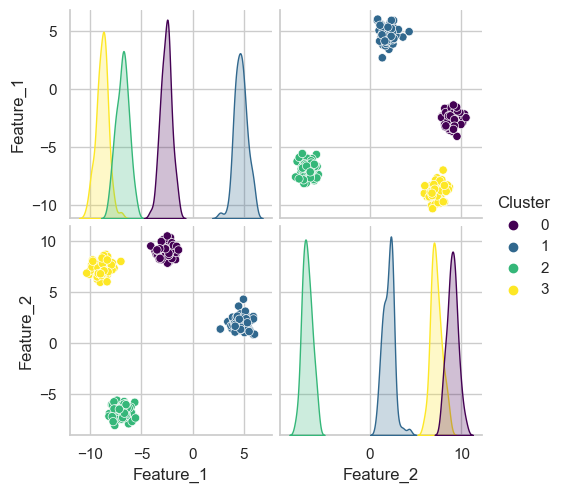

In [8]:

# Create a DataFrame with cluster labels
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df["Cluster"] = labels

# Display first few rows
print(df.head())

# Visualize using seaborn
sns.pairplot(df, hue="Cluster", palette="viridis")
plt.show()



Exercise:

Explain what do you understand from the plot above

c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


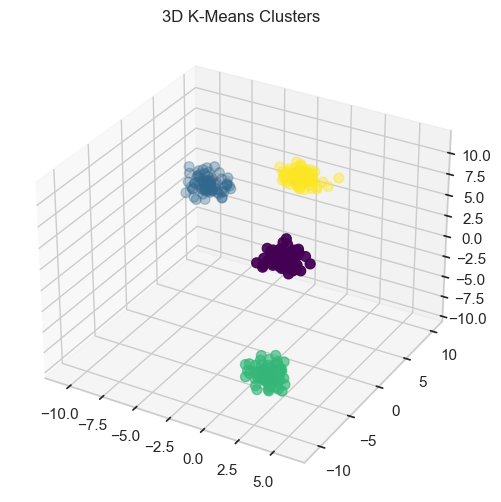

In [9]:

X_3d, _ = make_blobs(
    n_samples=300, 
    centers=4, 
    cluster_std=0.7, 
    n_features=3, 
    random_state=42
)

kmeans_3d = KMeans(n_clusters=4, random_state=42).fit(X_3d)
labels_3d = kmeans_3d.labels_
centers_3d = kmeans_3d.cluster_centers_

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], c=labels_3d, cmap='viridis', s=50)
ax.scatter(centers_3d[:,0], centers_3d[:,1], centers_3d[:,2], c='red', s=200, marker='X')
ax.set_title("3D K-Means Clusters")
plt.show()


Key Takeaways

K-Means partitions data into k clusters based on similarity.


It minimizes the distance between data points and their cluster centroids.


The Elbow Method helps choose the right number of clusters.


Works best with well-separated, spherical clusters.

Limitations:


Sensitive to outliers and initialization.


Assumes clusters of similar size and density.



Exercises:


1 - Try K-Means on real datasets (e.g., Iris, Mall Customers)


2 - Compare with DBSCAN or Hierarchical Clustering


3 - Standardize or scale data for better performance